In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
xls = pd.ExcelFile('/content/drive/MyDrive/DAB303/Individual project/VFSG Data_FINAL.xlsx')
df1 = pd.read_excel(xls, 'Per Capita Water Availability')
df2 = pd.read_excel(xls, 'By sector',skiprows=1)
df3 = pd.read_excel(xls, 'By source',skiprows=1)
df4 = pd.read_excel(xls, 'Monsoon performance',skiprows=4, usecols='B:F', names= ['Year','Normal','Excess','Deficient/Scanty','rainfall(%)'])
df5 = pd.read_excel(xls, 'Status of GW dev',skiprows=1, usecols='B:E')
df6 = pd.read_excel(xls, 'GW extraction countries')

In [90]:
df1 = df1.dropna()
df1['Population'] = [361088090,438936918,838583988,1028737436,1210854977,1407563842]
df1['Per Capita Availability'] = [100,91.4,42.7,35.1,29.8,28.7]
df1['Per Capita Availability'] = df1['Per Capita Availability'].astype(str) + '%'
df1

<ipython-input-90-d0b9e532ef8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Population'] = [361088090,438936918,838583988,1028737436,1210854977,1407563842]
<ipython-input-90-d0b9e532ef8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Per Capita Availability'] = [100,91.4,42.7,35.1,29.8,28.7]
<ipython-input-90-d0b9e532ef8d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Year,Per Capita Water Availability (cubic meters) in India,Population,Per Capita Availability
0,1951,5177.0,361088090,100.0%
1,1961,4731.0,438936918,91.4%
4,1991,2209.0,838583988,42.7%
5,2001,1816.0,1028737436,35.1%
6,2011,1545.0,1210854977,29.8%
7,2021,1486.0,1407563842,28.7%


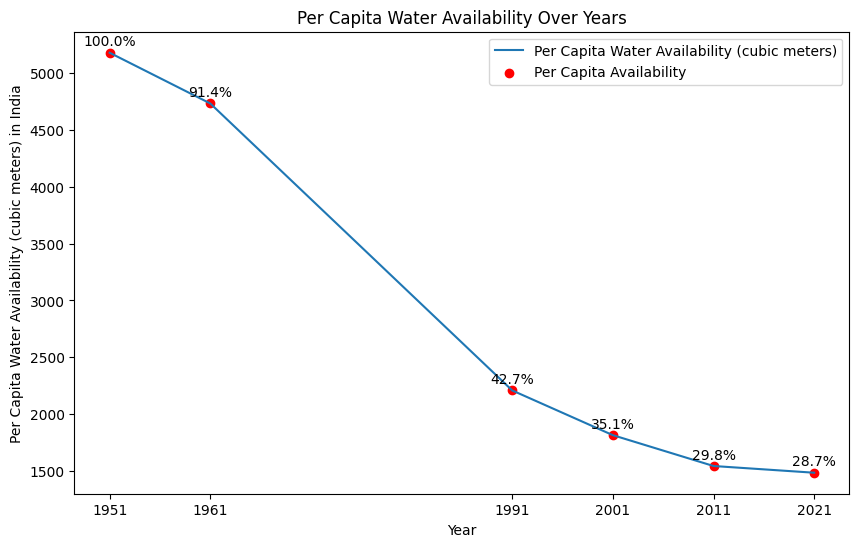

In [91]:
# Create a line graph with points and annotate specific points
plt.figure(figsize=(10, 6))

# Line graph for 'Per Capita Water Availability (cubic meters) in India'
plt.plot(df1['Year'], df1['Per Capita Water Availability (cubic meters) in India'], label='Per Capita Water Availability (cubic meters)')

# Scatter plot for 'Per Capita Availability'
plt.scatter(df1['Year'], df1['Per Capita Water Availability (cubic meters) in India'], c='red', label='Per Capita Availability')

# Annotate specific points with 'Per Capita Availability' values
for i, txt in enumerate(df1['Per Capita Availability']):
    plt.annotate(txt, (df1['Year'].iloc[i], df1['Per Capita Water Availability (cubic meters) in India'].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Water Availability (cubic meters) in India')
plt.title('Per Capita Water Availability Over Years')

# Show legend
plt.legend()

# Set x-axis ticks only for the available years
plt.xticks(df1['Year'])

# Show the plot
plt.show()

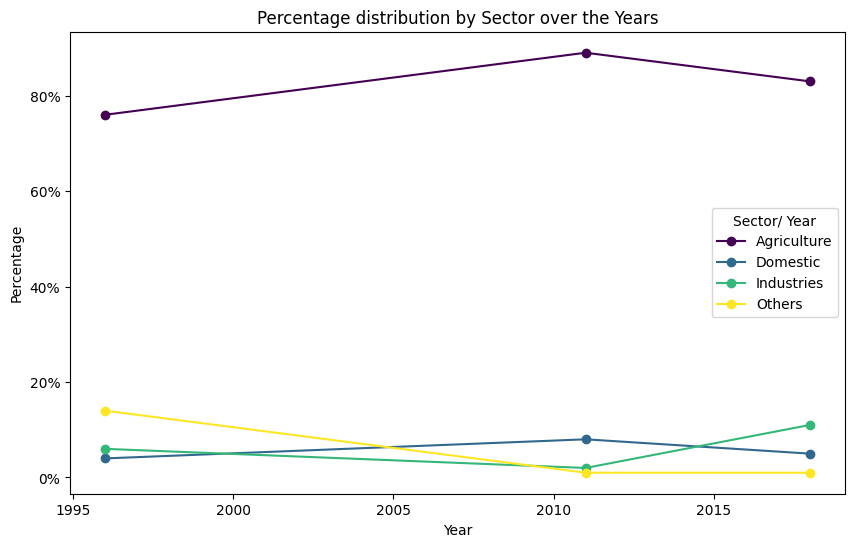

In [92]:
# Set the 'Sector/Year' column as the index
df2.set_index('Sector/ Year', inplace=True)

# Transpose the DataFrame for a line plot
df2_transposed = df2.T

# Plotting
ax = df2_transposed.plot(kind='line', marker='o', figsize=(10, 6), colormap='viridis')

# Set y-axis ticks as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1))

ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('Percentage distribution by Sector over the Years')

# Display the plot
plt.show()


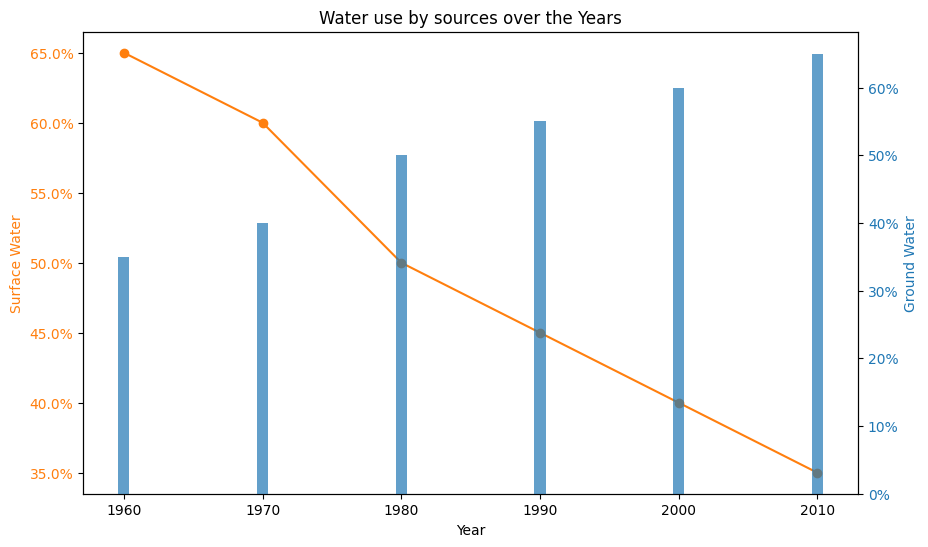

In [93]:
df3 = df3.dropna()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Line plot for Surface water
color = 'tab:orange'
ax1.set_xlabel('Year')
ax1.set_ylabel('Surface Water', color=color)
ax1.plot(df3['Year'], df3['Surface water'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Bar plot for Ground water
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Ground Water', color=color)
ax2.bar(df3['Year'], df3['Ground water'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

# Set y-axis ticks as percentages
ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax2.yaxis.set_major_formatter(PercentFormatter(1))

# Title
plt.title('Water use by sources over the Years')

# Display the plot
plt.show()

In [95]:
# Calculate the total count of assessment units for each district in each state
total_count_df5 = df5.groupby(['State', 'District']).size().reset_index(name='Total_Count')

# Filter rows with 'critical' status
critical_df5 = df5[df5['Status of groundwater development '].isin(['critical', 'over-exploited', 'over_exploited', 'semi-critical'])]

# Calculate the count of assessment units in a critical state for each district in each state
critical_count_df5 = critical_df5.groupby(['State', 'District']).size().reset_index(name='Critical_Count')

# Merge the total count and critical count DataFrames
merged_df5 = pd.merge(total_count_df5, critical_count_df5, on=['State', 'District'], how='left')

# Fill NaN values (districts with no critical assessment units) with 0
merged_df5['Critical_Count'].fillna(0, inplace=True)

# Calculate the percentage of assessment units in a critical state for each district in each state
merged_df5['Percentage'] = (merged_df5['Critical_Count'] / merged_df5['Total_Count'] * 100).round(2)

merged_df5 = merged_df5[merged_df5['Critical_Count'] != 0]
# Display the resulting DataFrame
merged_df5

,State,District,Total_Count,Critical_Count,Percentage
3,Andhra Pradesh,Anantapur,63,33.0,52.38
4,Andhra Pradesh,Chittoor,66,26.0,39.39
5,Andhra Pradesh,East Godavari,64,2.0,3.12
6,Andhra Pradesh,Guntur,57,3.0,5.26
7,Andhra Pradesh,Kadapa,51,29.0,56.86
8,Andhra Pradesh,Krishna,50,2.0,4.00
9,Andhra Pradesh,Kurnool,54,7.0,12.96
10,Andhra Pradesh,Nellore,46,1.0,2.17
11,Andhra Pradesh,Prakasam,56,10.0,17.86
12,Andhra Pradesh,Srikakulam,38,7.0,18.42


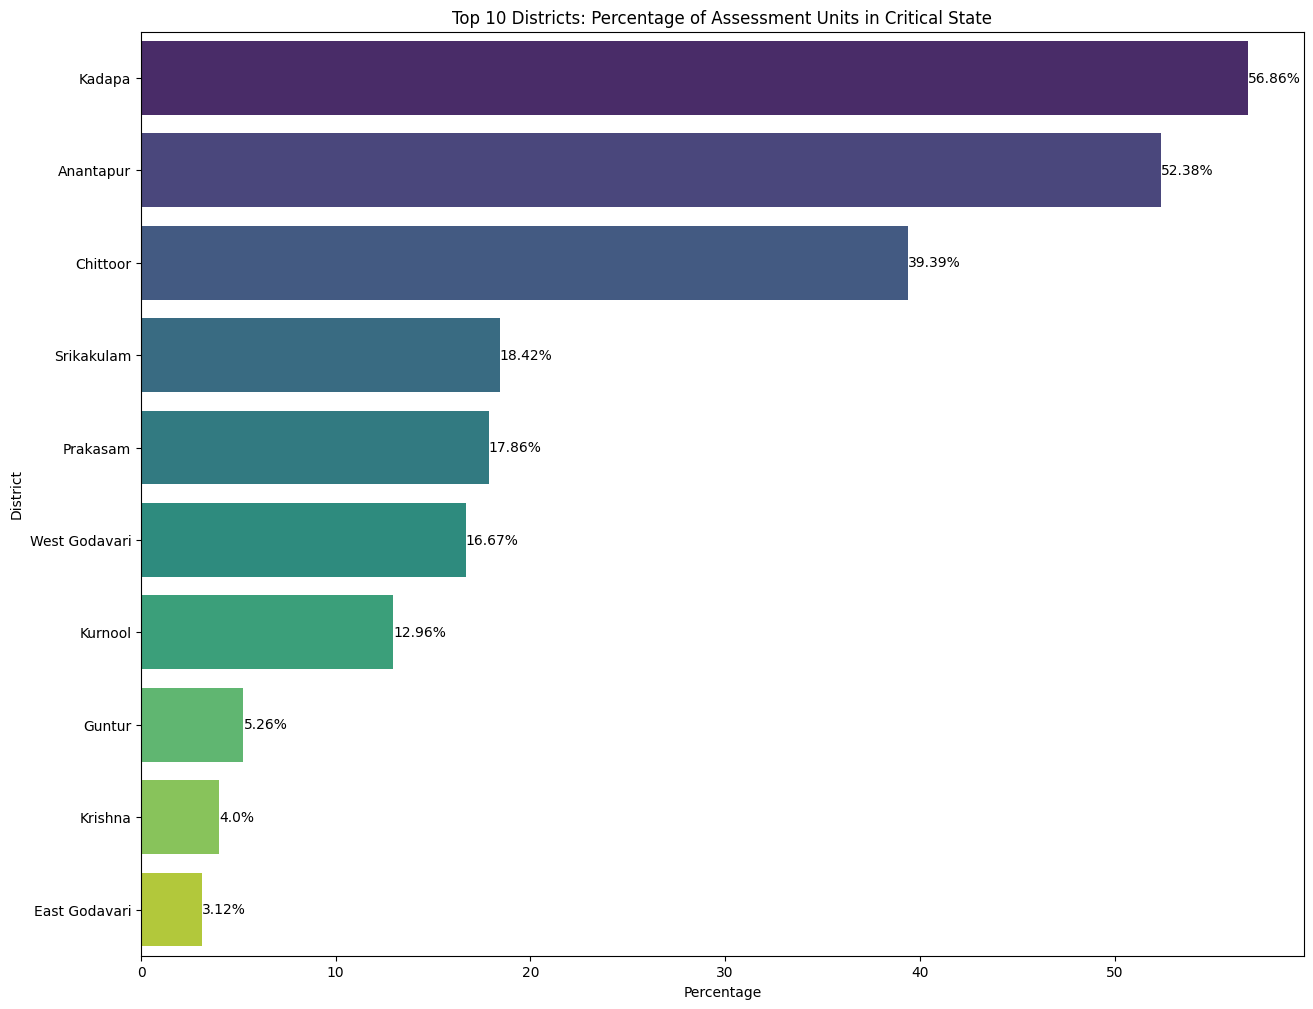

In [96]:
# Sort the DataFrame by Percentage in descending order
top_10_df_sorted = top_10_df.sort_values(by='Percentage', ascending=False)

# Plotting a horizontal bar graph
plt.figure(figsize=(15, 12))
sns.barplot(x='Percentage', y='District', data=top_10_df_sorted, palette='viridis')

# Annotate the bars with percentage values
for index, value in enumerate(top_10_df_sorted['Percentage']):
    plt.text(value, index, f'{value}%', ha='left', va='center', fontsize=10, color='black')

# Title and labels
plt.title('Top 10 Districts: Percentage of Assessment Units in Critical State')
plt.xlabel('Percentage')
plt.ylabel('District')

# Display the plot
plt.show()

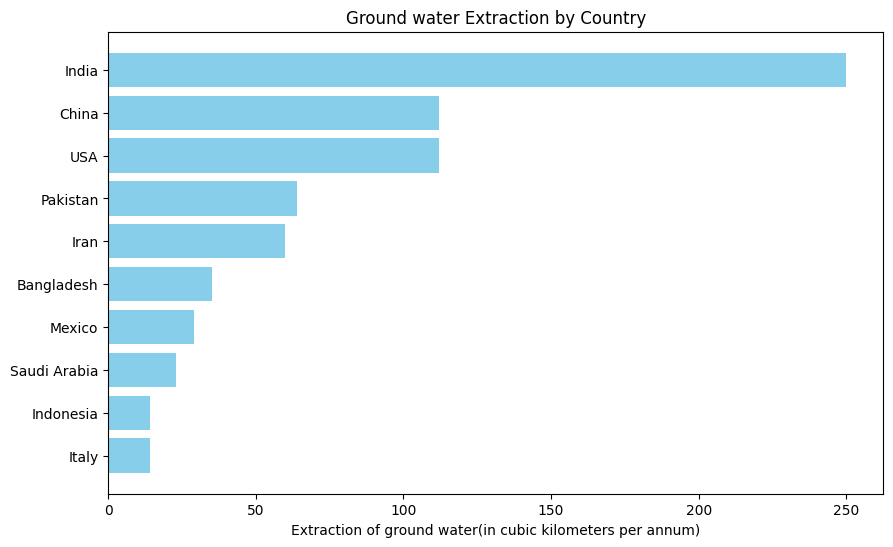

In [98]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df6['Country'], df6['Extraction (in cubic kilometers per annum)'], color='skyblue')
plt.xlabel('Extraction of ground water(in cubic kilometers per annum)')
plt.title('Ground water Extraction by Country')
plt.gca().invert_yaxis()

# Display the plot
plt.show()